<a href="https://colab.research.google.com/github/11AJ/Deep-Learning/blob/main/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


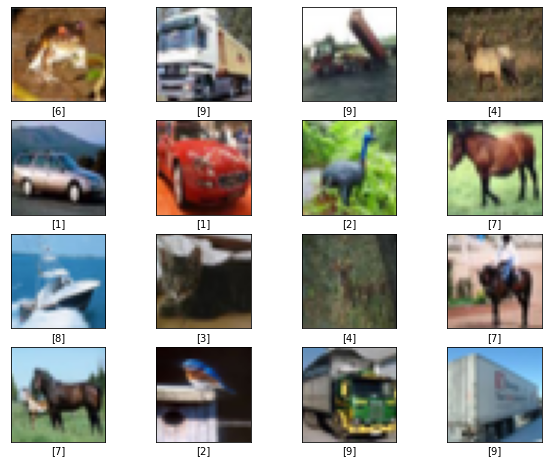

In [5]:
plt.figure(figsize=(10,8))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_train[i])
plt.show()

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train[1].shape

(32, 32, 3)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [11]:
m1=Sequential()
m1.add(Conv2D(256,(3,3),activation='relu',input_shape=(32,32,3)))
m1.add(MaxPooling2D(pool_size=(2,2)))
# m1.add(Conv2D(128,(2,2),activation='relu'))
# m1.add(MaxPooling2D(pool_size=(3,3)))
m1.add(Flatten())
m1.add(Dense(256,activation='relu'))
m1.add(Dense(10,activation='softmax'))

In [12]:
m1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
h1=m1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 291s 186ms/step - loss: 1.4093 - accuracy: 0.5004 - val_loss: 1.2025 - val_accuracy: 0.5662
Epoch 2/10
1563/1563 [==============================] - 289s 185ms/step - loss: 1.0927 - accuracy: 0.6173 - val_loss: 1.0933 - val_accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 289s 185ms/step - loss: 0.9377 - accuracy: 0.6710 - val_loss: 1.1006 - val_accuracy: 0.6128
Epoch 4/10
1563/1563 [==============================] - 289s 185ms/step - loss: 0.8065 - accuracy: 0.7153 - val_loss: 1.1468 - val_accuracy: 0.6169
Epoch 5/10
1563/1563 [==============================] - 290s 186ms/step - loss: 0.6810 - accuracy: 0.7625 - val_loss: 1.0804 - val_accuracy: 0.6478
Epoch 6/10
1563/1563 [==============================] - 288s 184ms/step - loss: 0.5635 - accuracy: 0.8034 - val_loss: 1.1467 - val_accuracy: 0.6503
Epoch 7/10
1563/1563 [==============================] - 288s 184ms/step - loss: 0.4597 - accuracy: 0.8397 - val_

In [14]:
res=pd.DataFrame(h1.history)
res['Epochs']=h1.epoch
res.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
5,0.563528,0.80344,1.146701,0.6503,5
6,0.459699,0.83966,1.246509,0.6358,6
7,0.366631,0.87386,1.365901,0.6468,7
8,0.298805,0.89846,1.546309,0.6364,8
9,0.234921,0.92152,1.676194,0.6416,9


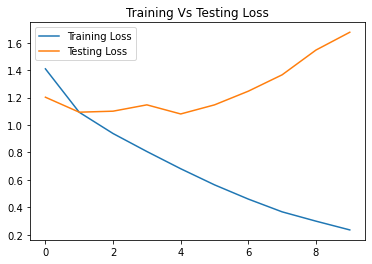

In [15]:
plt.plot(res['Epochs'],res['loss'],label='Training Loss')
plt.plot(res['Epochs'],res['val_loss'],label='Testing Loss')
plt.title('Training Vs Testing Loss')
plt.legend()
plt.show()

In [16]:
y_pred=m1.predict(x_test)
y_pred=[np.argmax(i) for i in y_pred]
y_pred[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [21]:
y_test1=[np.argmax(i) for i in y_test]
y_test1[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

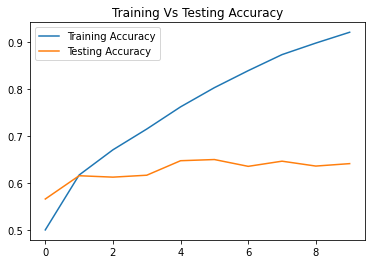

In [17]:
plt.plot(res['Epochs'],res['accuracy'],label='Training Accuracy')
plt.plot(res['Epochs'],res['val_accuracy'],label='Testing Accuracy')
plt.title('Training Vs Testing Accuracy')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_pred,y_test1))
print(classification_report(y_pred,y_test1))

[[646  24  66  19  21  13   8  14  60  35]
 [ 26 806  12  20   8  10  19   9  57 147]
 [ 58   5 419  65  76  49  32  37   5   8]
 [ 42  18 109 517  92 224  69  78  29  32]
 [ 22   2 113  53 533  35  30  52   3   3]
 [ 10  10  88 173  56 538  25  68  12  14]
 [ 20  11 102  81 108  49 795  20  11  14]
 [  9   4  48  33  83  52   8 690   3  15]
 [124  32  34  16  15  16   8   7 786  46]
 [ 43  88   9  23   8  14   6  25  34 686]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       906
           1       0.81      0.72      0.76      1114
           2       0.42      0.56      0.48       754
           3       0.52      0.43      0.47      1210
           4       0.53      0.63      0.58       846
           5       0.54      0.54      0.54       994
           6       0.80      0.66      0.72      1211
           7       0.69      0.73      0.71       945
           8       0.79      0.73      0.75      1084
           9       0.69     